### Preprocesamiento6
### IPN- CIC
### Alumno: Jorge Diego García Torres
#### Titulo : Clasificación de los grados de retinopatía diabética en imágenes del fondo del ojo mediante algoritmos de aprendizaje profundo.

In [1]:
import pandas as pd

train_df = pd.read_csv('California Healthcare Foundation/trainLabels.csv')

Librerias

In [2]:
from tqdm import tqdm
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import os

from numpy import asarray
from numpy import save


In [3]:
train_df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


# filtros, resize, crop

In [4]:
from PIL import Image

def preprocess_image(image_path, desired_size=224):
    im = Image.open(image_path)
    im = im.resize((desired_size, )*2, resample=Image.LANCZOS)
    
    return im

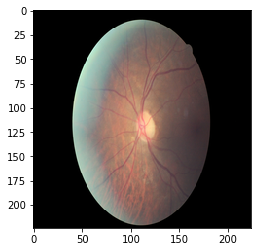

In [6]:
img=preprocess_image(f'California Healthcare Foundation/train/train 2/10_left.jpeg')
from matplotlib import pyplot as plt

plt.imshow(img)

In [7]:
def crop_image_from_gray(img, tol=7):

    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]

    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): 
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

In [8]:
def circle_crop1(img, sigmaX = 30):   
   
    img = crop_image_from_gray(img)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

In [9]:
def resize(image_pil, width, height):

    ratio_w = width / image_pil.width
    ratio_h = height / image_pil.height
    if ratio_w < ratio_h:

        resize_width = width
        resize_height = round(ratio_w * image_pil.height)
    else:

        resize_width = round(ratio_h * image_pil.width)
        resize_height = height
    image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (width, height), (0, 0, 0, 0)) #fondo negro o blanco
    offset = (round((width - resize_width) / 2), round((height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [10]:
import cv2
import numpy as np

img = cv2.imread('California Healthcare Foundation/train/train 2/10_left.jpeg')
image = crop_image_from_gray(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pilimage =Image.fromarray(image)
image =resize(pilimage,224,224)
#image.save(DIR2+'/'+image_id+'.png')


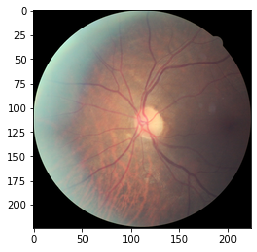

In [11]:

plt.imshow(image)

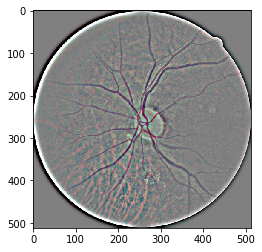

In [12]:
img = cv2.imread('California Healthcare Foundation/train/train 2/10_left.jpeg')
img=circle_crop1(img)
pilim =Image.fromarray(img)
img= resize(pilim,512,512)
imga=np.array(img) 
plt.imshow(imga/255.)

Establecer tamaño
Establecer carpeta de destino y origen

Nota. el programa falla en la imagen 30 mil y algo y es debido a que no esta en la base de datos por lo cual se elimina del pandas y se continua con las 411 imagenes restantes 

In [26]:
from tqdm import tqdm
import os

DIR = 'California Healthcare Foundation/train/train 2'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'California Healthcare Foundation/train/train-128-crop' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG_size = 128  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(train_df['image'])):
    img = cv2.imread(DIR+'/'+image_id+'.jpeg')
    image = crop_image_from_gray(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pilimage =Image.fromarray(image)
    img =resize(pilimage,IMG_size,IMG_size)
    img.save(DIR2+'/'+image_id+'.png')



  0%|          | 2/35126 [00:07<35:50:02,  3.67s/it]


KeyboardInterrupt: 

In [14]:
train_df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [15]:
train_df[train_df.image != '43862_left']

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 2 columns):
image    35126 non-null object
level    35126 non-null int64
dtypes: int64(1), object(1)
memory usage: 549.0+ KB


In [17]:
newtrain_df =train_df[train_df.index > 34714]

In [18]:
newtrain_df

,image,level
34715,43862_right,0
34716,43863_left,0
34717,43863_right,0
34718,43867_left,0
34719,43867_right,0
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


Se aplica el mismo procedimiento con las 411 imagenes restantes

In [19]:
from tqdm import tqdm
import os

DIR = 'California Healthcare Foundation/train/train 2'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'California Healthcare Foundation/train/train-128-crop' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG_size = 128  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(newtrain_df['image'])):

    img = cv2.imread(DIR+'/'+image_id+'.jpeg')
    image = crop_image_from_gray(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pilimage =Image.fromarray(image)
    img =resize(pilimage,IMG_size,IMG_size)
    img.save(DIR2+'/'+image_id+'.png')


 75%|███████▌  | 309/411 [09:53<02:34,  1.51s/it]


100%|██████████| 411/411 [13:23<00:00,  1.95s/it]


0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

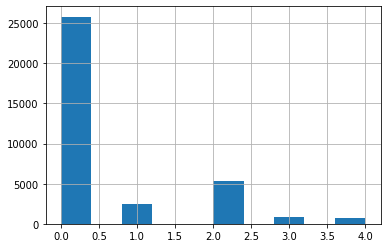

In [20]:
train_df['level'].hist()
train_df['level'].value_counts()

In [21]:
train_df.tail(10)

,image,level
35116,44339_left,0
35117,44339_right,0
35118,44343_left,0
35119,44343_right,0
35120,44347_left,0
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0
35125,44349_right,1


In [22]:
train1_df =train_df[train_df.image != '43862_left']
train1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35125 entries, 0 to 35125
Data columns (total 2 columns):
image    35125 non-null object
level    35125 non-null int64
dtypes: int64(1), object(1)
memory usage: 823.2+ KB


Se guardan en un archivo .npy

In [27]:
IMG_SIZE= 128


DIR = 'California Healthcare Foundation/train/train-512-crop' #carpeta con los datos 

num_channels = 3 # canales, rgb, escala de grises
xtrain = np.zeros((35125, IMG_SIZE, IMG_SIZE, num_channels), dtype=np.uint8)


for i, image_id in enumerate(tqdm(train1_df['image'])):
    image = cv2.imread(f'California Healthcare Foundation/train/train-128-crop/{image_id}.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    xtrain[i,:,:,:] = image


 15%|█▌        | 5391/35125 [00:40<02:09, 229.26it/s]


 32%|███▏      | 11069/35125 [01:19<02:56, 136.10it/s]


 52%|█████▏    | 18236/35125 [01:55<01:22, 203.89it/s]


 66%|██████▌   | 23211/35125 [02:34<02:12, 89.97it/s]


 76%|███████▌  | 26629/35125 [03:14<02:56, 48.21it/s]


 87%|████████▋ | 30669/35125 [03:54<00:29, 148.61it/s]


100%|██████████| 35125/35125 [04:34<00:00, 127.82it/s][A


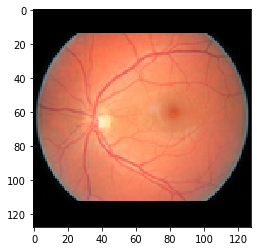

In [28]:
plt.imshow(xtrain[35124])

In [30]:
from numpy import asarray
from numpy import save

data = asarray(xtrain)
save('California Healthcare Foundation/train/xtrainchf128.npy', data)

# Ahora vamos a crear los mismo dataset pero con el blur

In [ ]:
img = cv2.imread(f'California Healthcare Foundation/train/train-224-crop/10_left.jpeg')

In [ ]:
train1_df =train_df[train_df.image != '43862_left']


DIR = 'California Healthcare Foundation/train/train-224-crop'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'California Healthcare Foundation/train/train-224-circle-crop' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG_size =  224 # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(train1_df['image'])):
    img = cv2.imread(DIR+'/'+image_id+'.jpeg')
    image = img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , 30) ,-4 ,128)
    img =Image.fromarray(image)
    img.save(DIR2+'/'+image_id+'.png')
    
    #img = cv2.imread(DIR+'/'+image_id+'.jpeg')
    #image = crop_image_from_gray(img)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #pilimage =Image.fromarray(image)
    #img =resize(pilimage,IMG_size,IMG_size)
    #img.save(DIR2+'/'+image_id+'.png')